## Preamble

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [3]:
ipath = '/mnt/2878194E75608246/!UNI/03 Meteorology BA/SEM24 Applied Machine Learning/Projekt/archive-data/' 
N_SPECIES = 400
IMG_PER_SPECIES = 5 # test set has only 5 imgs per species
img_size = (112,112)

In [4]:
# Create list of all species names -> for prediction
df = pd.read_csv(ipath+'birds.csv')
df = df[df['data set'] == 'test']
species_labels = np.array(df.groupby('labels').head(1)['labels'])
print(species_labels.shape)

(400,)


In [5]:
def ReadTestData(n_species=50, img_per_species=120, img_size=(224,224)):
    n_total = n_species*img_per_species   
    df = pd.read_csv(ipath+'birds.csv')
    df = df[df['data set'] == 'test']  
    df = df[df['class index'] < n_species] 
    df = df.groupby('labels').head(img_per_species) 
    labels_ini = df['class index'].values
    data = np.zeros((n_total,)+img_size+(3,)) # 4D array (sample,ysize,xsize, color channel)
    labels = np.zeros([n_total])
    filepaths = list(df['filepaths'])
    print(f' -- Reading {n_total} images.')

    for i in range(n_total):
        if i%1000 == 0: print(f' Images read: {i}')
        label_this_img = labels_ini[i]
        ipath_img = ipath + filepaths[i]
        tmp_img =  np.flip(image.imread(ipath_img),axis=0)/255 
        if img_size != (224,224): tmp_img = np.array(tf.image.resize(tmp_img,img_size)) 
        data[i,:,:,:] = tmp_img[:,:,:]
        labels[i] = label_this_img

    labels = to_categorical(labels)
    return data, labels

def plot_img(data):
    plt.figure(figsize=(5,5))
    ax = plt.subplot()
    ax.imshow(np.flip(data,axis=0))
    plt.show() 

## Load saved model

In [7]:
model = keras.models.load_model('CNNv6-6xCONV-4xDENSE-adam-400-120-112-36-True-True-True')
model.summary()

Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      4736      
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 37, 37, 64)        256       
 chNormalization)                                                
                                                          

## Load test data to evaluate test accuracy

In [8]:
test_data, test_labels = ReadTestData(n_species=N_SPECIES, img_per_species=IMG_PER_SPECIES, img_size=img_size)
loss, accuracy = model.evaluate(test_data,test_labels)
print(f'Final test accuracy is {accuracy*100:.2f} %.')

 -- Reading 2000 images.
 Images read: 0
 Images read: 1000


2024-01-23 23:46:10.394665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600


63/63 [==============================] - 1s 5ms/step - loss: 0.3515 - accuracy: 0.9160
Final test accuracy is 91.60 %.


## Predict my image

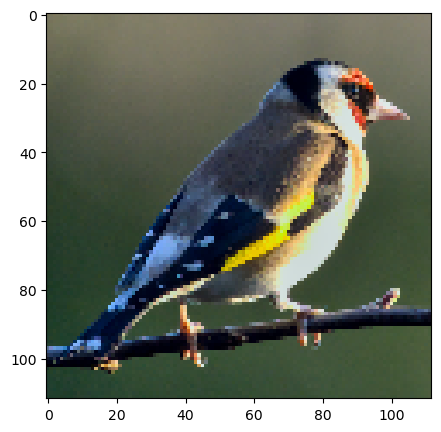

In [9]:
ipath_img = 'IMG_EuropeanGoldfinch.png' 
my_img = np.flip(image.imread(ipath_img),axis=0) 
my_img = np.array(tf.image.resize(my_img,img_size))[np.newaxis,...]
plot_img(my_img[0])

In [10]:
probability = model.predict(my_img)[0]
index_argmax = probability.argmax()
print(f'\nPrediction: {species_labels[index_argmax]} ({index_argmax})')

1/1 [==============================] - 0s 141ms/step

Prediction: EUROPEAN GOLDFINCH (166)
